In [1]:
import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [2]:

transform = T.Compose([
    T.ToTensor(),
    # Uncomment if you want normalized data for later modeling:
    # T.Normalize((0.1307,), (0.3081,))
])

train_ds = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_ds = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

print("Train size:", len(train_ds))
print("Test  size:", len(test_ds))
print("Classes:", train_ds.classes)


100%|██████████| 9.91M/9.91M [00:00<00:00, 37.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.24MB/s]

Train size: 60000
Test  size: 10000
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


One sample
  img type: <class 'torch.Tensor'>
  img shape: (1, 28, 28) (C,H,W)
  img dtype: torch.float32
  img min/max: 0.0 1.0
  label: 5 -> 5 - five


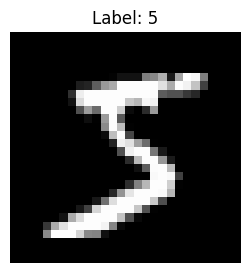

In [3]:
img, label = train_ds[0]
print("One sample")
print("  img type:", type(img))
print("  img shape:", tuple(img.shape), "(C,H,W)")
print("  img dtype:", img.dtype)
print("  img min/max:", float(img.min()), float(img.max()))
print("  label:", label, "->", train_ds.classes[label])

plt.figure(figsize=(3,3))
plt.imshow(img.squeeze(0), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


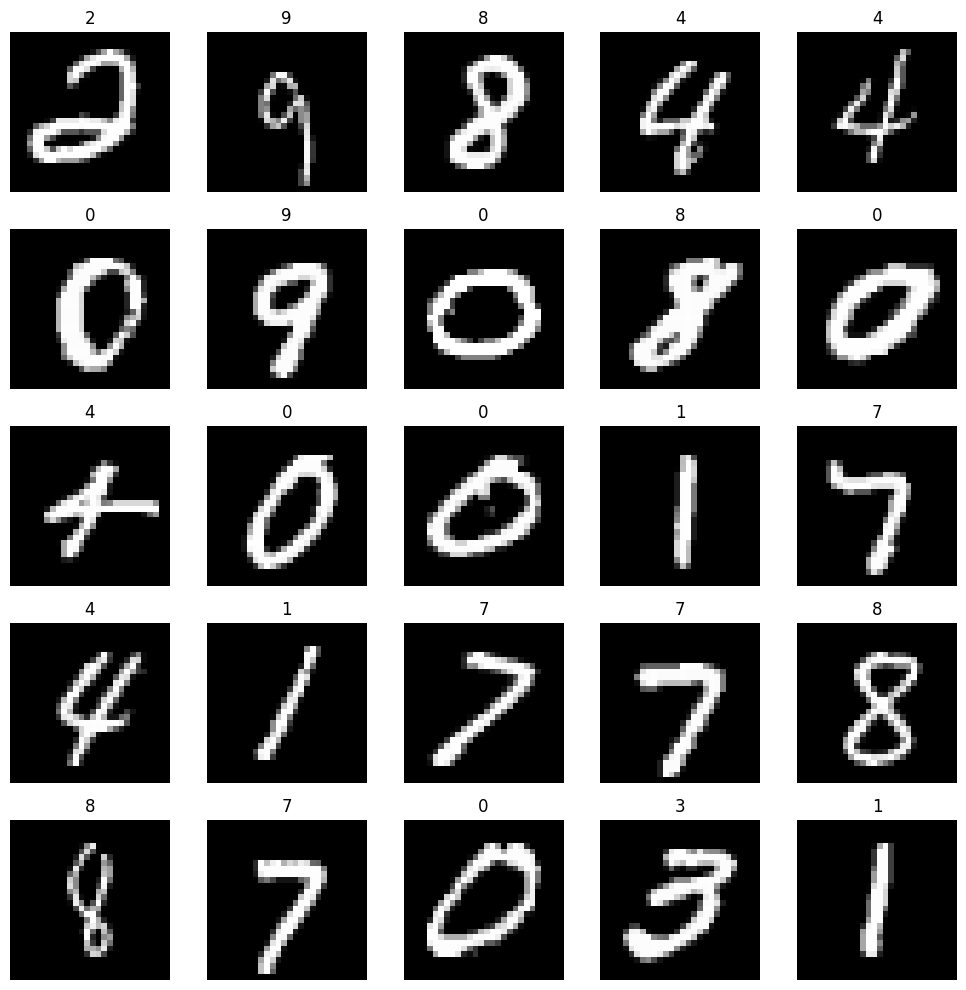

In [4]:
def show_grid(dataset, n=25, seed=0):
    rng = np.random.default_rng(seed)
    idxs = rng.choice(len(dataset), size=n, replace=False)

    cols = int(np.sqrt(n))
    rows = int(np.ceil(n / cols))

    plt.figure(figsize=(cols*2, rows*2))
    for i, idx in enumerate(idxs, 1):
        img, label = dataset[idx]
        plt.subplot(rows, cols, i)
        plt.imshow(img.squeeze(0), cmap="gray")
        plt.title(str(label))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_grid(train_ds, n=25, seed=42)


Train counts: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
Test  counts: [980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


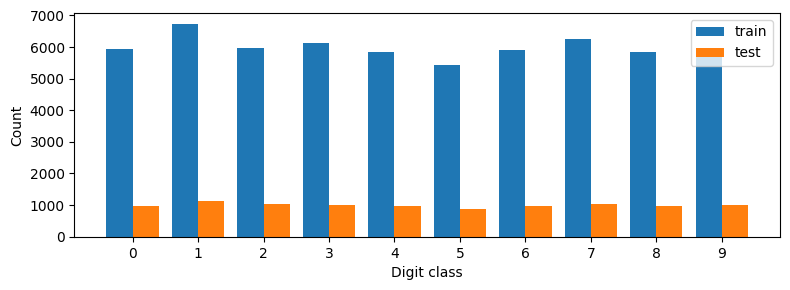

In [5]:
def class_counts(dataset):
    # MNIST labels are available as dataset.targets (torch tensor)
    targets = dataset.targets.cpu().numpy().tolist()
    cnt = Counter(targets)
    return [cnt[i] for i in range(10)]

train_counts = class_counts(train_ds)
test_counts = class_counts(test_ds)

print("Train counts:", train_counts)
print("Test  counts:", test_counts)

x = np.arange(10)
plt.figure(figsize=(8,3))
plt.bar(x - 0.2, train_counts, width=0.4, label="train")
plt.bar(x + 0.2, test_counts, width=0.4, label="test")
plt.xticks(x)
plt.xlabel("Digit class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
# If you plan to train, it's useful to know mean/std.
# We'll compute on train set (in [0,1] after ToTensor).
loader = DataLoader(train_ds, batch_size=512, shuffle=False, num_workers=2)

sum_ = 0.0
sum_sq = 0.0
n_pixels = 0

for x, _ in loader:
    # x: [B,1,28,28]
    sum_ += x.sum().item()
    sum_sq += (x ** 2).sum().item()
    n_pixels += x.numel()

mean = sum_ / n_pixels
var = sum_sq / n_pixels - mean**2
std = var**0.5

print(f"MNIST train mean: {mean:.6f}")
print(f"MNIST train std : {std:.6f}")


MNIST train mean: 0.130660
MNIST train std : 0.308108


Batch x: (64, 1, 28, 28) Batch y: (64,)
y[:10]: [8, 6, 3, 5, 3, 7, 8, 2, 8, 7]


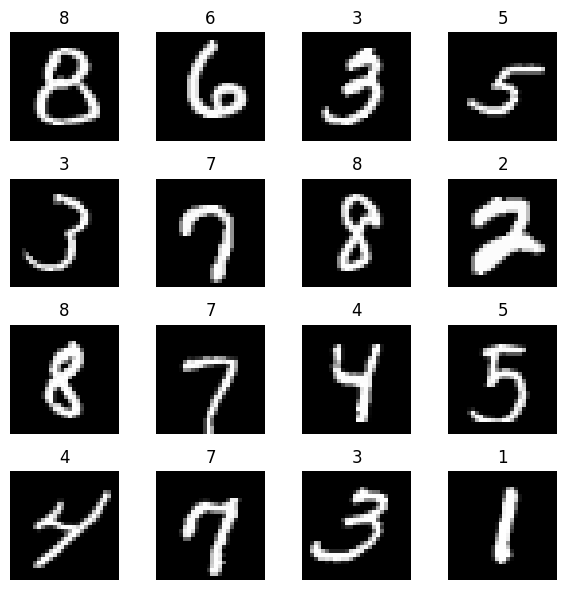

In [7]:
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False, num_workers=2)

x, y = next(iter(train_loader))
print("Batch x:", tuple(x.shape), "Batch y:", tuple(y.shape))
print("y[:10]:", y[:10].tolist())

# visualize first 16 in the batch
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i].squeeze(0), cmap="gray")
    plt.title(int(y[i]))
    plt.axis("off")
plt.tight_layout()
plt.show()


In [8]:
# CIFAR-10: 32x32 RGB images
transform = T.Compose([
    T.ToTensor(),
    # Uncomment later for training:
    # T.Normalize((0.4914, 0.4822, 0.4465),
    #             (0.2470, 0.2435, 0.2616))
])

train_ds = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
test_ds = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

print("Train size:", len(train_ds))
print("Test  size:", len(test_ds))
print("Classes:", train_ds.classes)


100%|██████████| 170M/170M [00:01<00:00, 103MB/s]


Train size: 50000
Test  size: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


One sample
  img type: <class 'torch.Tensor'>
  img shape: (3, 32, 32) (C,H,W)
  img dtype: torch.float32
  img min/max: 0.0 1.0
  label: 6 -> frog


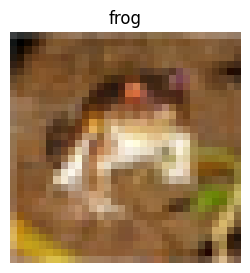

In [10]:
img, label = train_ds[0]

print("One sample")
print("  img type:", type(img))
print("  img shape:", tuple(img.shape), "(C,H,W)")
print("  img dtype:", img.dtype)
print("  img min/max:", float(img.min()), float(img.max()))
print("  label:", label, "->", train_ds.classes[label])

plt.figure(figsize=(3,3))
plt.imshow(img.permute(1,2,0))  # CHW -> HWC
plt.title(train_ds.classes[label])
plt.axis("off")
plt.show()


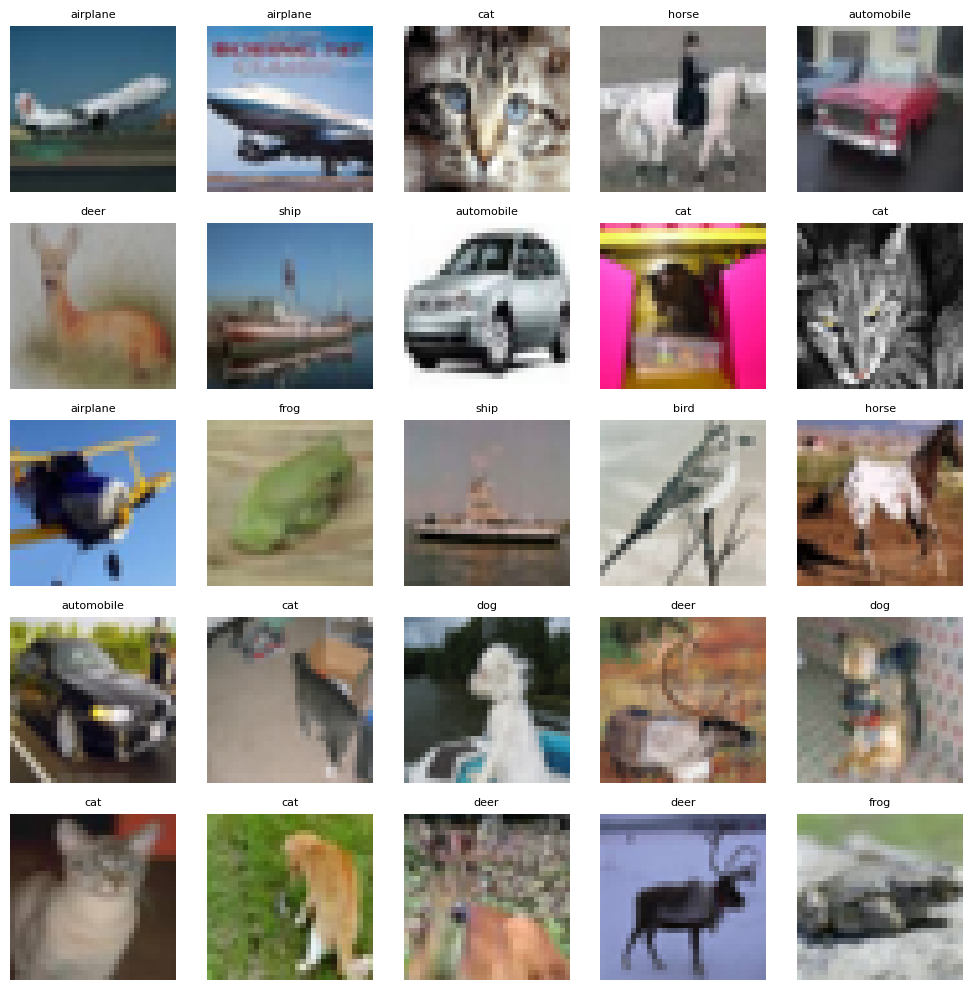

In [11]:
def show_grid(dataset, n=25, seed=0):
    rng = np.random.default_rng(seed)
    idxs = rng.choice(len(dataset), size=n, replace=False)

    cols = int(np.sqrt(n))
    rows = int(np.ceil(n / cols))

    plt.figure(figsize=(cols*2, rows*2))
    for i, idx in enumerate(idxs, 1):
        img, label = dataset[idx]
        plt.subplot(rows, cols, i)
        plt.imshow(img.permute(1,2,0))
        plt.title(dataset.classes[label], fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_grid(train_ds, n=25, seed=42)


Train counts: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
Test  counts: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


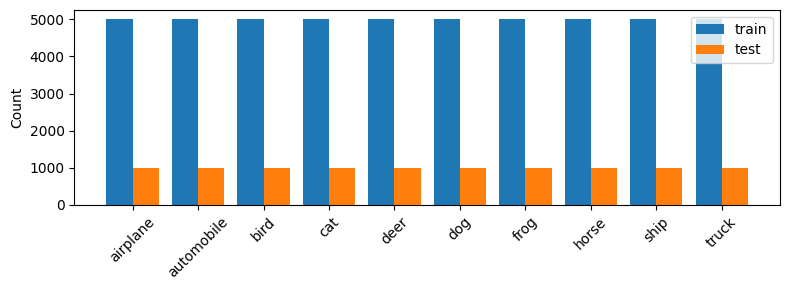

In [12]:
def class_counts(dataset):
    targets = dataset.targets  # list[int] for CIFAR-10
    cnt = Counter(targets)
    return [cnt[i] for i in range(10)]

train_counts = class_counts(train_ds)
test_counts = class_counts(test_ds)

print("Train counts:", train_counts)
print("Test  counts:", test_counts)

x = np.arange(10)
plt.figure(figsize=(8,3))
plt.bar(x - 0.2, train_counts, width=0.4, label="train")
plt.bar(x + 0.2, test_counts, width=0.4, label="test")
plt.xticks(x, train_ds.classes, rotation=45)
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
loader = DataLoader(train_ds, batch_size=256, shuffle=False, num_workers=2)

sum_ = torch.zeros(3)
sum_sq = torch.zeros(3)
n_pixels = 0

for x, _ in loader:
    # x: [B,3,32,32]
    sum_ += x.sum(dim=[0,2,3])
    sum_sq += (x ** 2).sum(dim=[0,2,3])
    n_pixels += x.shape[0] * x.shape[2] * x.shape[3]

mean = sum_ / n_pixels
var = sum_sq / n_pixels - mean**2
std = torch.sqrt(var)

print("CIFAR-10 train mean:", mean.tolist())
print("CIFAR-10 train std :", std.tolist())


CIFAR-10 train mean: [0.4913996458053589, 0.48215845227241516, 0.4465310275554657]
CIFAR-10 train std : [0.2470323145389557, 0.24348507821559906, 0.26158758997917175]


Batch x: (64, 3, 32, 32)
Batch y: (64,)
y[:10]: [4, 2, 6, 7, 0, 2, 6, 1, 8, 3]


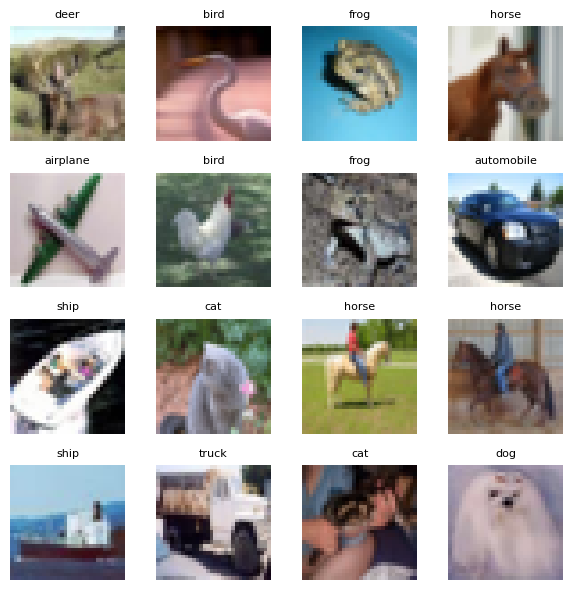

In [14]:
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False, num_workers=2)

x, y = next(iter(train_loader))
print("Batch x:", tuple(x.shape))  # [64,3,32,32]
print("Batch y:", tuple(y.shape))
print("y[:10]:", y[:10].tolist())

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i].permute(1,2,0))
    plt.title(train_ds.classes[y[i]], fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()
